# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import owm_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [53]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
test_cities = ['warman','hilo','karauzyak']
query_url = f'{url}appid={owm_key}&units={units}&q='
city_lats = []
city_longs = []
city_temps = []
city_humidity = []
city_cloudiness = []
city_wind = []
city_name = []
countries = []
dates = []
city_number = 0
# response = requests.get(query_url + 'san miguel').json()
# response#['wind']['speed']
for city in cities:
    city_number = city_number +1
    print(f'Searching for city {city_number}: {city}')
    try:
        response = requests.get(query_url + city)
        data = response.json()
        city_name.append(data['name'])
        city_lats.append(data['coord']['lat'])
        city_longs.append(data['coord']['lon'])
        city_temps.append(data['main']['temp_max'])
        city_humidity.append(data['main']['humidity'])
        city_cloudiness.append(data['clouds']['all'])
        city_wind.append(data['wind']['speed'])
        countries.append(data['sys']['country'])
        dates.append(data['dt'])   
    except:
        print(f"{city} not found")
# response = requests.get(query_url + 'hilo').json()
# response['coord']['lat']

Searching for city 1: warman
Searching for city 2: hilo
Searching for city 3: karauzyak
karauzyak not found
Searching for city 4: kununurra
Searching for city 5: grand river south east
grand river south east not found
Searching for city 6: kruisfontein
Searching for city 7: nadadores
Searching for city 8: tasiilaq
Searching for city 9: punta arenas
Searching for city 10: yellowknife
Searching for city 11: vaitupu
vaitupu not found
Searching for city 12: vitim
Searching for city 13: saint-philippe
Searching for city 14: kapaa
Searching for city 15: matay
Searching for city 16: bondoukou
Searching for city 17: saskylakh
Searching for city 18: tucson
Searching for city 19: ushuaia
Searching for city 20: amberley
Searching for city 21: mar del plata
Searching for city 22: abonnema
Searching for city 23: andes
Searching for city 24: cidreira
Searching for city 25: kavieng
Searching for city 26: qaanaaq
Searching for city 27: aksarka
Searching for city 28: sumbe
Searching for city 29: rikite

umzimvubu not found
Searching for city 239: porosozero
Searching for city 240: raudeberg
Searching for city 241: salvador
Searching for city 242: chivay
Searching for city 243: bo phloi
Searching for city 244: peniche
Searching for city 245: juneau
Searching for city 246: lata
Searching for city 247: gravdal
Searching for city 248: carnarvon
Searching for city 249: rawson
Searching for city 250: barawe
barawe not found
Searching for city 251: abu dhabi
Searching for city 252: hadsund
Searching for city 253: kudahuvadhoo
Searching for city 254: noyabrsk
Searching for city 255: kimbe
Searching for city 256: kupang
Searching for city 257: tual
Searching for city 258: cayenne
Searching for city 259: kahului
Searching for city 260: hobbs
Searching for city 261: ahipara
Searching for city 262: skagastrond
skagastrond not found
Searching for city 263: salalah
Searching for city 264: rosarito
Searching for city 265: kavaratti
Searching for city 266: chabahar
Searching for city 267: camacha
Sea

Searching for city 476: pacific grove
Searching for city 477: nemuro
Searching for city 478: kisangani
Searching for city 479: balabac
Searching for city 480: san patricio
Searching for city 481: tahta
Searching for city 482: sarangani
Searching for city 483: aitape
Searching for city 484: gunjur
Searching for city 485: skibbereen
Searching for city 486: vanderhoof
Searching for city 487: boralday
Searching for city 488: chilca
Searching for city 489: toliary
toliary not found
Searching for city 490: luderitz
Searching for city 491: price
Searching for city 492: kampong thum
Searching for city 493: nome
Searching for city 494: cuiluan
Searching for city 495: reshetikha
Searching for city 496: bloemfontein
Searching for city 497: srednebelaya
Searching for city 498: labutta
labutta not found
Searching for city 499: weligama
Searching for city 500: conde
Searching for city 501: nata
Searching for city 502: kaliua
Searching for city 503: kenitra
Searching for city 504: aflu
aflu not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
weather_data = {'City':city_name,
               'Lat':city_lats,
               'Lon':city_longs,
               'Temp':city_temps,
               'Humidity':city_humidity,
               'Cloudiness':city_cloudiness,
               'Wind Speed':city_wind,
               'Country':countries,
               'Date':dates}
output_data = pd.DataFrame(weather_data)
output_data

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Warman,52.3168,-106.5679,3.20,78,40,11.50,CA,1611842732
1,Hilo,19.7297,-155.0900,69.80,83,90,13.80,US,1611842743
2,Kununurra,-15.7667,128.7333,80.60,100,40,11.50,AU,1611843081
3,Kruisfontein,-34.0033,24.7314,78.01,47,0,8.01,ZA,1611843081
4,Nadadores,27.0500,-101.6000,46.99,32,100,4.34,MX,1611843081
...,...,...,...,...,...,...,...,...,...
576,Vostok,46.4856,135.8833,-3.91,91,100,3.76,RU,1611843188
577,Biak,-0.9131,122.8766,78.69,74,41,7.31,ID,1611843188
578,Hulan Ergi,47.2042,123.6333,-11.88,79,0,8.59,CN,1611843188
579,Srednekolymsk,67.4500,153.6833,-18.87,88,100,6.55,RU,1611843188


In [143]:
output_data.to_csv('weather_data.csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [65]:
humid_sort = output_data.loc[output_data.loc[:,'Humidity']>100,:]
humid_sort

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

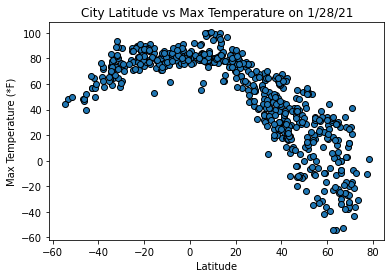

In [144]:
lat_temp = plt.scatter(output_data['Lat'], y=output_data['Temp'], edgecolors = 'black')
plt.title('City Latitude vs Max Temperature on 1/28/21')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (*F)')
plt.savefig('lat-temp_scatter.png')

## Latitude vs. Humidity Plot

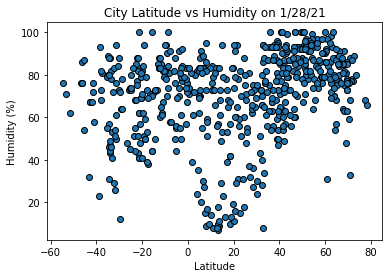

In [145]:
lat_hum = plt.scatter(output_data['Lat'], y=output_data['Humidity'], edgecolors = 'black')
plt.title('City Latitude vs Humidity on 1/28/21')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('lat-humidity_scatter.png')

## Latitude vs. Cloudiness Plot

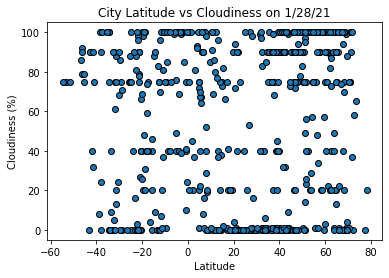

In [146]:
lat_hum = plt.scatter(output_data['Lat'], y=output_data['Cloudiness'], edgecolors = 'black')
plt.title('City Latitude vs Cloudiness on 1/28/21')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('lat-cloudiness_scatter.png')

## Latitude vs. Wind Speed Plot

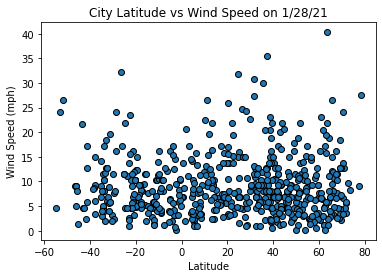

In [147]:
lat_hum = plt.scatter(output_data['Lat'], y=output_data['Wind Speed'], edgecolors = 'black')
plt.title('City Latitude vs Wind Speed on 1/28/21')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('lat-wind_scatter.png')

## Linear Regression

In [88]:
# Slice the data into northern and souther hemispheres
northern_hem = output_data.loc[output_data.loc[:,'Lat']>0,:]
southern_hem = output_data.loc[output_data.loc[:,'Lat']<0,:]

,City,Lat,Lon,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Kununurra,-15.7667,128.7333,80.60,100,40,11.50,AU,1611843081
3,Kruisfontein,-34.0033,24.7314,78.01,47,0,8.01,ZA,1611843081
6,Punta Arenas,-53.1500,-70.9167,48.20,71,75,24.16,CL,1611843082
9,Saint-Philippe,-21.3585,55.7679,86.00,62,90,10.36,RE,1611843082
15,Ushuaia,-54.8000,-68.3000,44.60,76,75,4.61,AR,1611842964
...,...,...,...,...,...,...,...,...,...
555,Moindou,-21.6924,165.6770,75.20,88,0,4.61,NC,1611843183
560,Pangoa,-12.1167,-73.0000,73.00,88,96,1.07,PE,1611843184
571,Port Macquarie,-31.4333,152.9167,71.60,94,75,5.75,AU,1611843187
577,Biak,-0.9131,122.8766,78.69,74,41,7.31,ID,1611843188


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

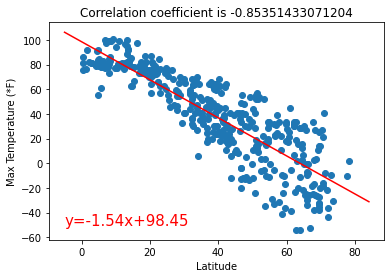

In [148]:
import scipy.stats as sts
from scipy.stats import linregress
corr_coef = sts.pearsonr(northern_hem['Lat'],northern_hem['Temp'])[0]
slope, intercept, r, p, ste = linregress(northern_hem['Lat'],northern_hem['Temp'])
x=np.arange(-5,85,1)
y_n_temp = (x*slope)+intercept
plt.scatter(northern_hem['Lat'],northern_hem['Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (*F)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(-5,-50),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('north-temp_regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

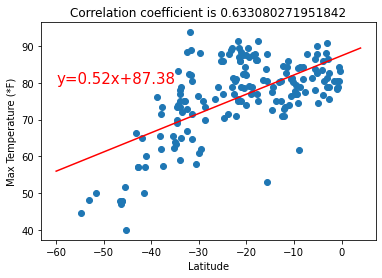

In [157]:
corr_coef = sts.pearsonr(southern_hem['Lat'],southern_hem['Temp'])[0]
slope, intercept, r, p, ste = linregress(southern_hem['Lat'],southern_hem['Temp'])
x=np.arange(-60,5,1)
y_n_temp = (x*slope)+intercept
plt.scatter(southern_hem['Lat'],southern_hem['Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (*F)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(-60,80),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('south-temp_regression.png')



The two regressions above model how temparature changes with respect to latitude.  The first plot represents the Northern Hemisphere.  The Second Plot represents the Southern Hemisphere.  The further away the city is from the equator (latitude 0), the colder the temperatures are.




####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

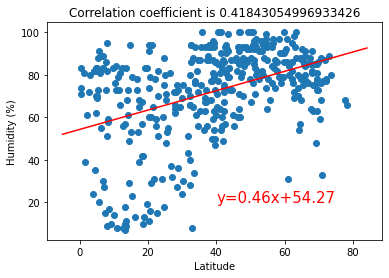

In [150]:
corr_coef = sts.pearsonr(northern_hem['Lat'],northern_hem['Humidity'])[0]
slope, intercept, r, p, ste = linregress(northern_hem['Lat'],northern_hem['Humidity'])
x=np.arange(-5,85,1)
y_n_temp = (x*slope)+intercept
plt.scatter(northern_hem['Lat'],northern_hem['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(40,20),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('north-humidity_regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

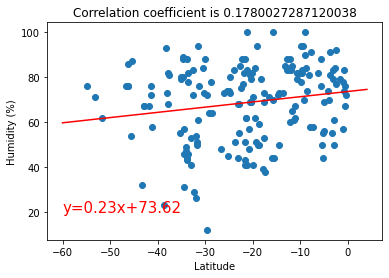

In [158]:
corr_coef = sts.pearsonr(southern_hem['Lat'],southern_hem['Humidity'])[0]
slope, intercept, r, p, ste = linregress(southern_hem['Lat'],southern_hem['Humidity'])
x=np.arange(-60,5,1)
y_n_temp = (x*slope)+intercept
plt.scatter(southern_hem['Lat'],southern_hem['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(-60,20),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('south-humidity_regression.png')

The two regressions above model how humidity changes with respect to latitude.  The first plot represents the Northern Hemisphere.  The Second Plot represents the Southern Hemisphere.  There does not seem to be a strong relationship between latitude and humidity in either hemisphere, though there is a stronger relationship in the Northern Hemisphere as indicated by the Pearson's R Correlation Coefficient and as seen by the regression line.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

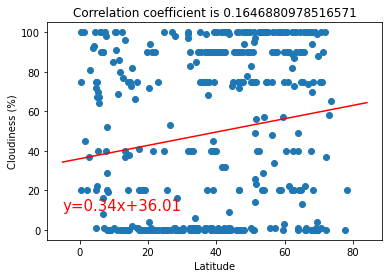

In [152]:
corr_coef = sts.pearsonr(northern_hem['Lat'],northern_hem['Cloudiness'])[0]
slope, intercept, r, p, ste = linregress(northern_hem['Lat'],northern_hem['Cloudiness'])
x=np.arange(-5,85,1)
y_n_temp = (x*slope)+intercept
plt.scatter(northern_hem['Lat'],northern_hem['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(-5,10),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('north-clouds_regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

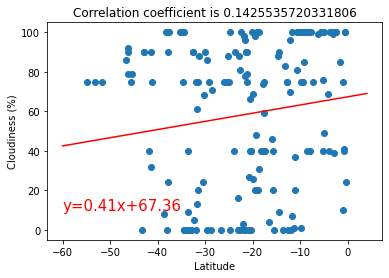

In [159]:
corr_coef = sts.pearsonr(southern_hem['Lat'],southern_hem['Cloudiness'])[0]
slope, intercept, r, p, ste = linregress(southern_hem['Lat'],southern_hem['Cloudiness'])
x=np.arange(-60,5,1)
y_n_temp = (x*slope)+intercept
plt.scatter(southern_hem['Lat'],southern_hem['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(-60,10),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('south-clouds_regression.png')

The two regressions above model how cloudiness changes with respect to latitude.  The first plot represents the Northern Hemisphere.  The Second Plot represents the Southern Hemisphere.  There is no relationshp in either hemisphere.  Not knowing exactly how this data is collected, I am going to assume that it is based on observation, because the data points seem to be clustered around the round percentages like 0, 10, 20, etc. up to 100.  There are more data points at 0% and 100% for both hemispheres than for any other %.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

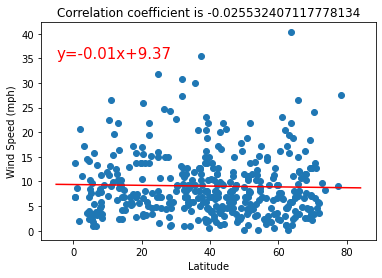

In [154]:
corr_coef = sts.pearsonr(northern_hem['Lat'],northern_hem['Wind Speed'])[0]
slope, intercept, r, p, ste = linregress(northern_hem['Lat'],northern_hem['Wind Speed'])
x=np.arange(-5,85,1)
y_n_temp = (x*slope)+intercept
plt.scatter(northern_hem['Lat'],northern_hem['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(-5,35),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('north-wind_regression.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

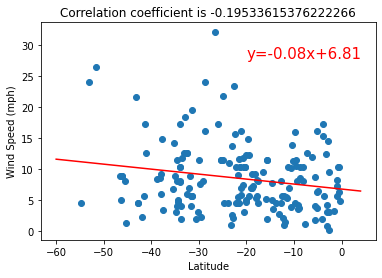

In [155]:
corr_coef = sts.pearsonr(southern_hem['Lat'],southern_hem['Wind Speed'])[0]
slope, intercept, r, p, ste = linregress(southern_hem['Lat'],southern_hem['Wind Speed'])
x=np.arange(-60,5,1)
y_n_temp = (x*slope)+intercept
plt.scatter(southern_hem['Lat'],southern_hem['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.plot(x,y_n_temp, c='r')
plt.annotate('y={:.2f}x+{:.2f}'.format(slope,intercept),(-20,28),fontsize=15,color="red")
plt.title(f'Correlation coefficient is {corr_coef}')
plt.savefig('south-wind_regression.png')

The two regressions above model how wind speed changes with respect to latitude.  The first plot represents the Northern Hemisphere.  The Second Plot represents the Southern Hemisphere.  There does not appear to be any relationship between latitude and wind speed in either hemisphere.  Wind speeds seem consistent across most latitudes.